## This data is being pulled from a Zillow API. This data was pulled on XX-XX-XX and is limited to 500 entry 

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from sklearn.linear_model import LinearRegression

### Load and Read Data

In [231]:
listed = pd.read_csv('recently_listed_houses.csv')
sold = pd.read_csv('recently_sold_houses.csv')

### Listed Home Data Frame

In [232]:
listed

,Unnamed: 0,zipid,sellertype,marketstatus,fulladdress,beds,baths,sqft,update,updatetype,...,taxassessedvalue,lotareavalue,lotareaunit,datepricechange,zestimate,rentzestimate,pricechange,url,streetviewurl,streetviewmetadataurl
0,0,26683152,For Sale by Agent,Condo for sale,"4044 Buena Vista St APT 218, Dallas, TX 75204",2.0,3.0,1085.0,Showcase,showcase,...,254980,0.861,acres,NaN,0,0,NaN,/homedetails/4044-Buena-Vista-St-APT-218-Dalla...,NaN,NaN
1,1,26809367,For Sale by Agent,House for sale,"3223 Whitehall Dr, Dallas, TX 75229",4.0,3.0,1988.0,Showcase,showcase,...,475730,0.298,acres,1.713856e+12,535200,3300,-17000.0,/homedetails/3223-Whitehall-Dr-Dallas-TX-75229...,NaN,NaN
2,2,26903542,For Sale by Agent,House for sale,"10777 Strait Ln, Dallas, TX 75229",6.0,11.0,17679.0,13 days on Zillow,daysOnZillow,...,10448460,3.304,acres,NaN,36954700,69738,NaN,/homedetails/10777-Strait-Ln-Dallas-TX-75229/2...,NaN,NaN
3,3,26813671,For Sale by Agent,House for sale,"5525 Glen Forest Ln, Dallas, TX 75241",4.0,4.0,2910.0,265 days on Zillow,daysOnZillow,...,490320,2.118,acres,1.717225e+12,283300,2829,-99000.0,/homedetails/5525-Glen-Forest-Ln-Dallas-TX-752...,NaN,NaN
4,4,96527896,For Sale by Agent,House for sale,"4002 Agnes St, Dallas, TX 75210",4.0,3.0,1653.0,Showcase,showcase,...,243480,0.130,acres,NaN,0,2365,NaN,/homedetails/4002-Agnes-St-Dallas-TX-75210/965...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,496,26730486,For Sale by Agent,House for sale,"1614 Engle Ave, Dallas, TX 75224",3.0,2.0,1308.0,5 hours ago,timeOnInfo,...,180250,0.175,acres,NaN,351500,2100,NaN,/homedetails/1614-Engle-Ave-Dallas-TX-75224/26...,NaN,NaN
464,497,26788275,For Sale by Agent,Multi-family home for sale,"3519 Nogales Dr, Dallas, TX 75220",4.0,3.0,1858.0,98 days on Zillow,daysOnZillow,...,197400,0.103,acres,1.714028e+12,0,0,-500.0,/homedetails/3519-Nogales-Dr-Dallas-TX-75220/2...,NaN,NaN
465,498,26702531,For Sale by Agent,House for sale,"6240 Marquita Ave, Dallas, TX 75214",3.0,3.0,2601.0,23 days on Zillow,daysOnZillow,...,737380,0.185,acres,1.717225e+12,893500,6035,-50000.0,/homedetails/6240-Marquita-Ave-Dallas-TX-75214...,NaN,NaN
466,499,26825874,For Sale by Agent,House for sale,"1627 Heather Glen Dr, Dallas, TX 75232",3.0,2.0,1632.0,30 days on Zillow,daysOnZillow,...,89770,0.183,acres,1.713424e+12,287900,1988,100.0,/homedetails/1627-Heather-Glen-Dr-Dallas-TX-75...,NaN,NaN


### Recently Sold Home Data Frame

In [233]:
sold

,Unnamed: 0,zipid,status,fulladdress,beds,baths,sqft,timeonzillow,latitude,longitude,...,state,datesold,livingarea,HomeType,zestimate,rentzestimate,taxassessedvalue,lotareavalue,lotareaunit,url
0,0,26684051,Sold,"5538 Junius St, Dallas, TX 75214",2.0,3.0,1966,69571000,32.804660,-96.76064,...,TX,-2147483648,1966,SINGLE_FAMILY,627200,3611,537170,0.215,acres,/homedetails/5538-Junius-St-Dallas-TX-75214/26...
1,1,26807390,Sold,"3619 Norcross Ln, Dallas, TX 75229",3.0,2.0,1899,69571000,32.890760,-96.86020,...,TX,-2147483648,1899,SINGLE_FAMILY,684800,3264,573280,0.267,acres,/homedetails/3619-Norcross-Ln-Dallas-TX-75229/...
2,2,26867404,Sold,"9545 Covemeadow Dr, Dallas, TX 75238",5.0,5.0,4679,69571000,32.881622,-96.72469,...,TX,-2147483648,4679,SINGLE_FAMILY,1551500,9688,540000,0.260,acres,/homedetails/9545-Covemeadow-Dr-Dallas-TX-7523...
3,3,26873685,Sold,"6879 Anglebluff Cir, Dallas, TX 75248",3.0,3.0,2136,69571000,32.966454,-96.78907,...,TX,-2147483648,2136,TOWNHOUSE,418200,3300,364980,0.125,acres,/homedetails/6879-Anglebluff-Cir-Dallas-TX-752...
4,4,303983624,Sold,"639 Aspen Valley Ln, Dallas, TX 75208",3.0,3.0,2592,69571000,32.750940,-96.85299,...,TX,-2147483648,2592,SINGLE_FAMILY,690000,3999,686750,0.075,acres,/homedetails/639-Aspen-Valley-Ln-Dallas-TX-752...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,495,26760452,Sold,"5761 Greenbrier Dr, Dallas, TX 75209",4.0,3.0,2694,1538371000,32.858150,-96.81281,...,TX,-2147483648,2694,SINGLE_FAMILY,1665800,9910,1156550,0.275,acres,/homedetails/5761-Greenbrier-Dr-Dallas-TX-7520...
428,496,26806884,Sold,"10315 Gooding Dr, Dallas, TX 75229",4.0,3.0,2917,1538371000,32.887215,-96.84372,...,TX,-2147483648,2917,SINGLE_FAMILY,976300,5518,624000,0.442,acres,/homedetails/10315-Gooding-Dr-Dallas-TX-75229/...
429,497,26817284,Sold,"9625 Silver Meadow Dr, Dallas, TX 75217",4.0,2.0,1300,1538371000,32.723980,-96.65588,...,TX,-2147483648,1300,SINGLE_FAMILY,275100,1898,115410,0.237,acres,/homedetails/9625-Silver-Meadow-Dr-Dallas-TX-7...
430,498,26822652,Sold,"6525 Leaning Oaks St, Dallas, TX 75241",3.0,1.0,1260,1538371000,32.658287,-96.76967,...,TX,-2147483648,1260,SINGLE_FAMILY,185300,1749,190800,0.160,acres,/homedetails/6525-Leaning-Oaks-St-Dallas-TX-75...


### Get rid of Null Values

In [234]:
# Fill NaN values in 'price' column with 0
listed['price'].fillna(0, inplace=True)
sold['zestimate'].fillna(0, inplace=True)

# Filter the DataFrame based on your conditions
listed = listed[(listed['price'] > 0) & (listed['sqft'].notna()) & (listed['price'].notna())]
sold = sold[(sold['zestimate'] > 0) & (sold['sqft'].notna()) & (sold['zestimate'].notna())]

### Filter Out Outliers (Top and Bottom 10%)

In [235]:
# Assuming 'data' is your DataFrame and 'price' is the column of interest
listedprice_10 = listed['price'].quantile(0.10)
listedprice_90 = listed['price'].quantile(0.90)

soldprice_10 = sold['zestimate'].quantile(0.10)
soldprice_90 = sold['zestimate'].quantile(0.90)


# Filter data to exclude the bottom 10% and top 10% of the price column
listed = listed[(listed['price'] > listedprice_10) & (listed['price'] < listedprice_90)]
sold = sold[(sold['zestimate'] > soldprice_10) & (sold['zestimate'] < soldprice_90)]

### Get a Summary of Sold Houses

In [236]:
# Filter out 0 prices
listed_non_zero_prices = listed[listed['price'] > 0]['price']
sold_non_zero_prices = sold[sold['zestimate'] > 0]['zestimate']

# Key parameters for listed houses
listed_summary = {
    'Number of Houses Listed': listed.shape[0],
    'Average Price of Listed House': int(listed['price'].mean()),
    'Max Price of Listed House': listed['price'].max(),
    'Min Price of Listed House (Non-zero)': listed_non_zero_prices.min(),
    'Average Sqft of Sold House (Non-zero)': int(listed['sqft'].mean())
}

# Key parameters for sold houses
sold_summary = {
    'Number of Houses Sold': sold.shape[0],
    'Average Price of Sold House': int(sold['zestimate'].mean()),
    'Max Price of Sold House': sold['zestimate'].max(),
    'Min Price of Sold House (Non-zero)': sold_non_zero_prices.min(),
    'Average Sqft of Sold House (Non-zero)': int(sold['sqft'].mean())
}

print("Listed Houses Summary:")
for key, value in listed_summary.items():
    print(f"{key}: {value}")

print("\nSold Houses Summary:")
for key, value in sold_summary.items():
    print(f"{key}: {value}")


Listed Houses Summary:
Number of Houses Listed: 372
Average Price of Listed House: 797686
Max Price of Listed House: 3895000
Min Price of Listed House (Non-zero): 229000
Average Sqft of Sold House (Non-zero): 2457

Sold Houses Summary:
Number of Houses Sold: 321
Average Price of Sold House: 592844
Max Price of Sold House: 1376800
Min Price of Sold House (Non-zero): 237200
Average Sqft of Sold House (Non-zero): 2121


# Plot the Data

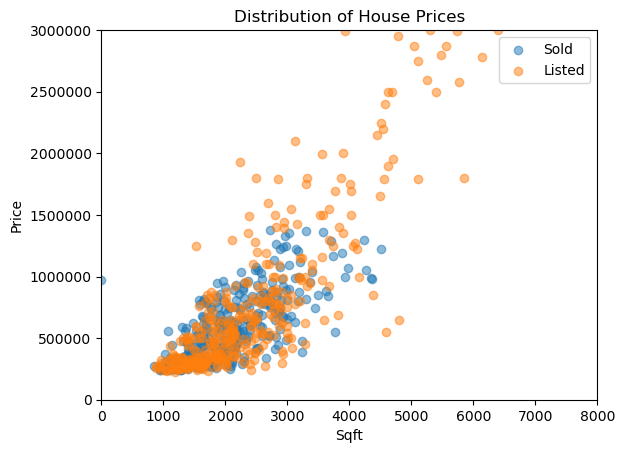

In [237]:
plt.scatter(sold['sqft'], sold['zestimate'], alpha=0.5, label='Sold')
plt.scatter(listed['sqft'], listed['price'], alpha=0.5, label='Listed')


plt.legend(loc='upper right')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Distribution of House Prices')

# Set y-axis in 100K increments and limit y-axis to 600K
plt.xlim(0, 8000)
plt.ylim(0, 3000000)

plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()

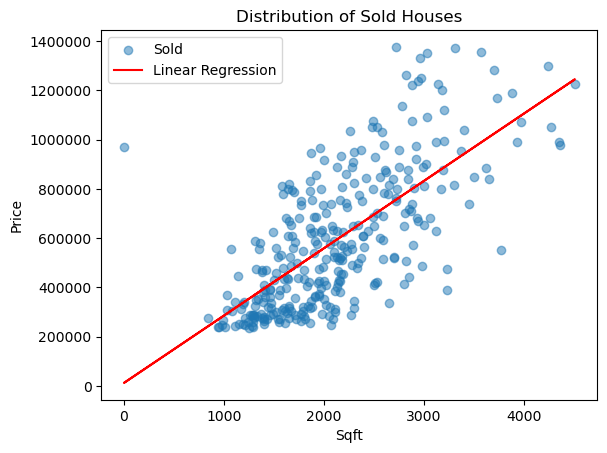

Slope of the line is equal to 273.64
Intercept of the line is equal to 12387.57


In [238]:
# Scatter plot
plt.scatter(sold['sqft'], sold['zestimate'], alpha=0.5, label='Sold')

# Convert data to numpy arrays and reshape for sklearn
x = np.array(sold['sqft']).reshape(-1, 1)
y = np.array(sold['zestimate'])

# Perform linear regression using sklearn
model = LinearRegression()
model.fit(x, y)

# Plot regression line
plt.plot(x, model.predict(x), color='red', label='Linear Regression')

# Plot settings
plt.legend(loc='upper left')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Distribution of Sold Houses')

slope = model.coef_[0]
intercept = model.intercept_

# Set y-axis in 100K increments and limit y-axis to 3 million
#plt.xlim(0, 8000)
#plt.ylim(0, 3000000)

# Disable scientific notation on y-axis
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()
print(f"Slope of the line is equal to {slope:.2f}")
print(f"Intercept of the line is equal to {intercept:.2f}")

## Listed Houses

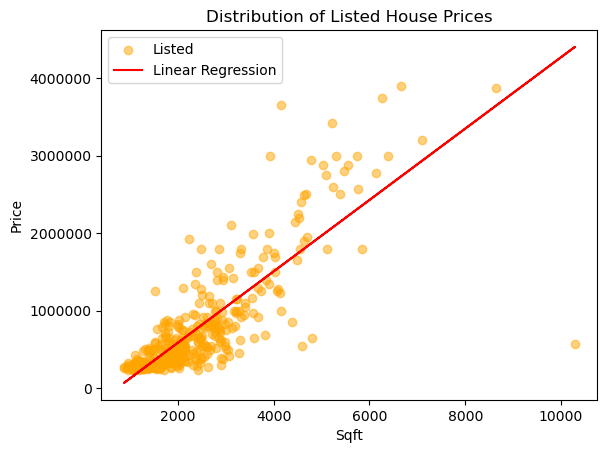

Slope of the line is equal to 460.36
Intercept of the line is equal to -333759.51


In [239]:
# Scatter plot
plt.scatter(listed['sqft'], listed['price'], alpha=0.5, label='Listed', color='orange')

# Convert data to numpy arrays and reshape for sklearn
x = np.array(listed['sqft']).reshape(-1, 1)
y = np.array(listed['price'])

# Perform linear regression using sklearn
model = LinearRegression()
model.fit(x, y)

# Plot regression line
plt.plot(x, model.predict(x), color='red', label='Linear Regression')

# Plot settings
plt.legend(loc='upper left')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title('Distribution of Listed House Prices')

slope = model.coef_[0]
intercept = model.intercept_

# Set y-axis in 100K increments and limit y-axis to 3 million
#plt.xlim(0, 8000)
#plt.ylim(0, 3000000)

# Disable scientific notation on y-axis
plt.gca().yaxis.get_major_formatter().set_scientific(False)

plt.show()
print(f"Slope of the line is equal to {slope:.2f}")
print(f"Intercept of the line is equal to {intercept:.2f}")

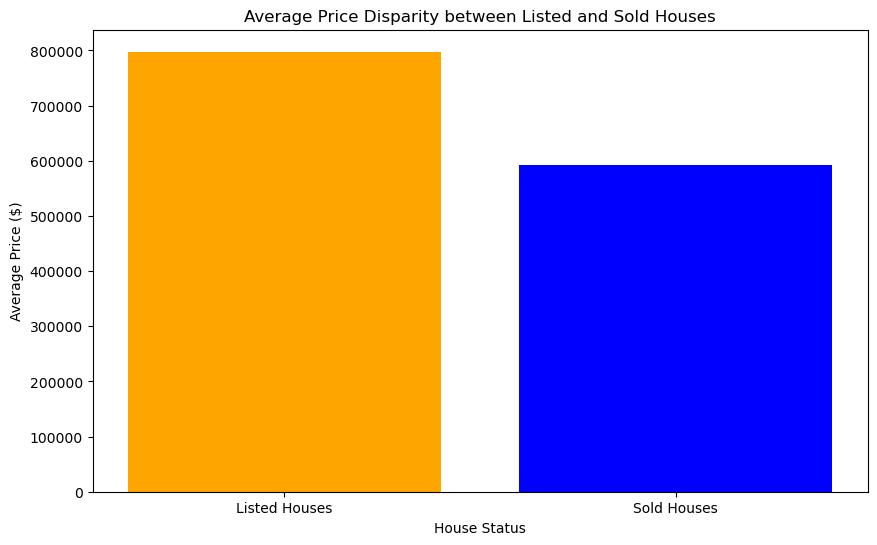

In [240]:
# Calculate average prices
average_price_listed = listed['price'].mean()
average_price_sold = sold['zestimate'].mean()

# Data for the average prices
labels = ['Listed Houses', 'Sold Houses']
average_prices = [average_price_listed, average_price_sold]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, average_prices, color=['orange', 'blue'])

# Add labels and title
plt.xlabel('House Status')
plt.ylabel('Average Price ($)')
plt.title('Average Price Disparity between Listed and Sold Houses')

# Add y-axis in millions for better readability
#plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x / 1e6:.1f}M'))

# Display the plot
plt.show()

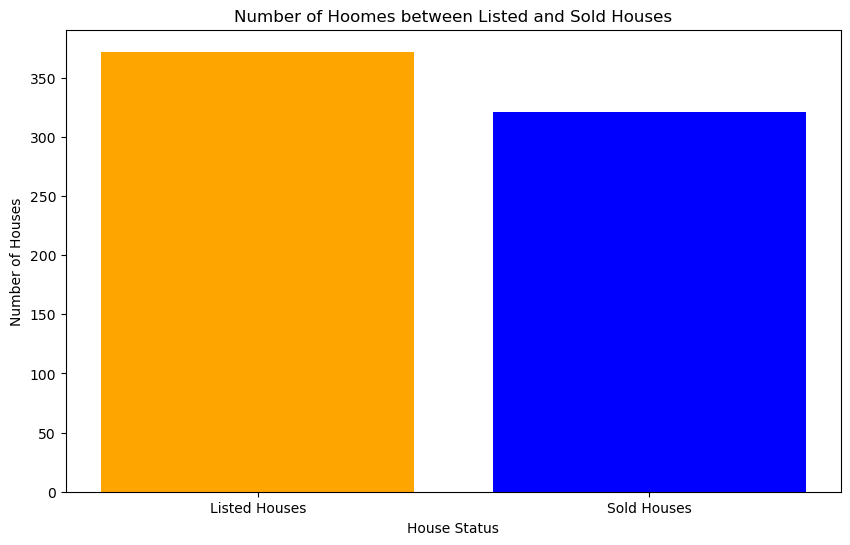

In [241]:
# Calculate average prices
number_listed = len(listed['price'])
number_sold = len(sold['zestimate'])

# Data for the average prices
labels = ['Listed Houses', 'Sold Houses']
average_prices = [number_listed, number_sold]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, average_prices, color=['orange', 'blue'])

# Add labels and title
plt.xlabel('House Status')
plt.ylabel('Number of Houses')
plt.title('Number of Hoomes between Listed and Sold Houses')

# Display the plot
plt.show()